In [4]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('H:\\extion project\\customer_churn_2nd_project\\data\\telco_customer_churn.csv')

# Basic info
print(df.shape)
print(df.columns)
df.head()


(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [6]:
# Fill missing values
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

C:\Users\SHIVANSHU SRIVASTAVA\AppData\Local\Temp\ipykernel_21544\457876299.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)


In [14]:
# Check data types to see which columns are object (i.e., strings)
df.dtypes[df.dtypes == 'object']


gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
Churn               object
dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

# Create a copy to avoid modifying original data
df_processed = df.copy()

# Encode binary columns
binary_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

le = LabelEncoder()
for col in binary_cols:
    df_processed[col] = le.fit_transform(df_processed[col])

# Use One-Hot Encoding for remaining categorical columns
df_processed = pd.get_dummies(df_processed, drop_first=True)


In [30]:
from sklearn.preprocessing import LabelEncoder
# Example: columns with strings
categorical_columns = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                       'PaperlessBilling', 'PaymentMethod']

le = LabelEncoder()

for col in categorical_columns:
    X[col] = le.fit_transform(X[col])



In [31]:
# Split features and target
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Split into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Churn Distribution')

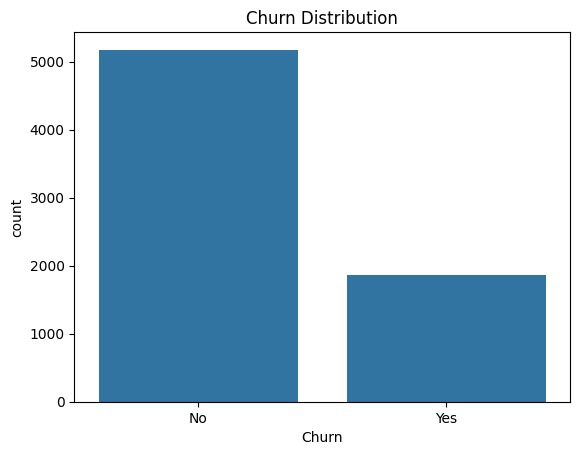

In [33]:
sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier



In [35]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier()
model.fit(X_train, y_train)


GradientBoostingClassifier()

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [37]:
y_pred = model.predict(X_test)


In [38]:
# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8090844570617459

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1036
           1       0.67      0.54      0.60       373

    accuracy                           0.81      1409
   macro avg       0.76      0.72      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Confusion Matrix:
[[937  99]
 [170 203]]


In [41]:
import joblib
joblib.dump(model, 'gradient_boost_model.pkl')


['gradient_boost_model.pkl']

In [47]:
import pandas as pd

# Create a new input using the same columns
new_customer = pd.DataFrame([X_train.iloc[0]], columns=X_train.columns)

# Predict
prediction = model.predict(new_customer)
print("Will the customer churn?", "=>Yes" if prediction[0] == 1 else "=> No")


Will the customer churn? => No


In [48]:
# After you split and preprocessed your data
import joblib
joblib.dump(X_train, "X_train_columns.pkl")


['X_train_columns.pkl']